<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In [1]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be some of the challenges you might encounter.

Also, this project aims to increase your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for multi-class classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [ ]:
import sklearn

sklearn.__version__

'1.2.2'

In [ ]:
import xgboost

xgboost.__version__

'2.0.0'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male =   pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")

In [4]:
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [5]:
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [6]:
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [7]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [8]:
df_female.head(1)

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   

   interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  palmlength  poplitealheight  radialestylionlength  shouldercircumference  shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  thighcircumference  thighclearance  thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  waistheightomphalion  weightkg  wristcircumference  wristheight  Gender      Date Installation     Component          Branch PrimaryMOS SubjectsBirthLocation  SubjectNumericRace Ethnicity  DODRace  Age  Heightin  Weightlbs WritingPreference  
0                    645         363          399                   435                496                             447                      55                      404                  118                335                    368                           1268         113              362                   235                   1062                  327             148            803                     809            513  1647     1560                 1280            1013                 622             174            736           430               110                  844                           1488              406           295                 850         217                      345                   942       657                 152          756  Female  5-Oct-10    Fort Hood  Regular Army  Combat Support        92Y               Germany                   2       NaN        2   26        61        142        Right hand

In [9]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [10]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [11]:
df.shape

(6068, 108)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [13]:
df.info(max_cols=110)

# If we want to see the information of all features in dfs with
# many features, we can set max_cols to a higher value.
# or you can use verbose=True in df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [14]:
df.isnull().sum().any()

True

In [15]:
df.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


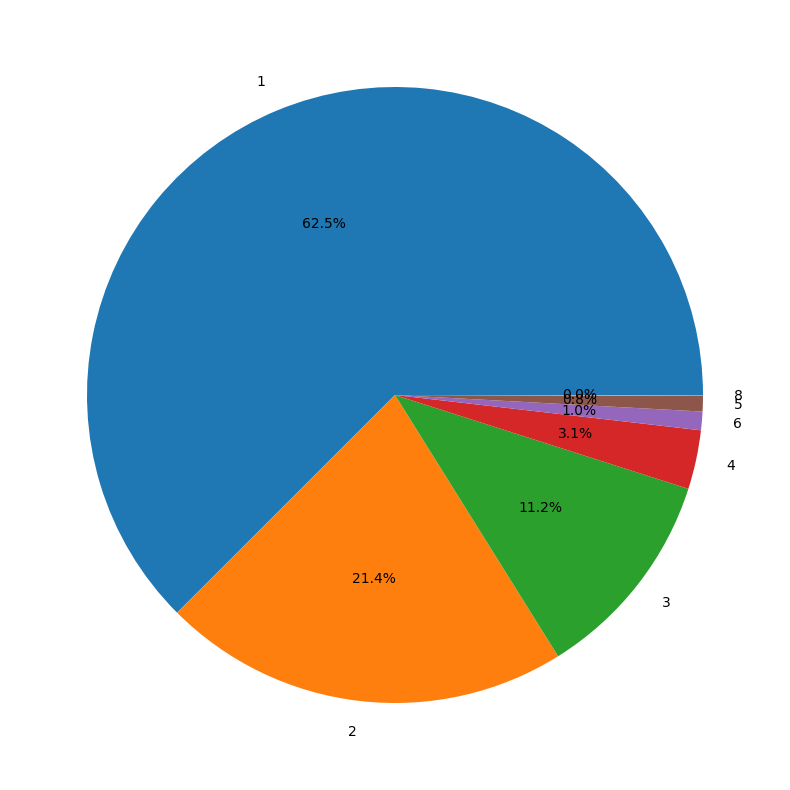

In [16]:
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.ylabel("");

In [17]:
drop_list = []
for col in df:
    if df[col].isnull().sum() > 0:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)


drop_list

# We have identified the featurs with missing value. There are 4647
# missing values in Ethnicity feature. As a best practice, if we have
# a missisng value not more than 20% and 30% of the total number of observations,
# these values can be filled. However, if it is more, the relevant data is
# dropped as it will be data manipulation.
# We will drop this feature since it corresponds to 4647/6068 = 76%.

# You can select a value between 6068 x 0.2 = 1213 and 6068 x 0.3 = 1820 and
# drop features with more missing values than this value.

# As follows

# drop_list =[]
# for col in df:
# if df[col].isnull().sum()>1800:
# print(f"{col} = {df[col].isnull().sum()}")
# drop_list.append(col)

Ethnicity = 4647


['Ethnicity']

In [18]:
df.drop(columns=drop_list, inplace=True)

In [19]:
df.isnull().sum().any()

False

In [20]:
df.shape

# Our feature count dropped from 108 to 107.

(6068, 107)

In [21]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

# We check our unique categorical observation numbers.
# We will drop the feature (Date), which shows the body measurement dates,
# the units where the measurements are done (installation),
# the specialty of the soldiers (PrimaryMOS) will not provide insight into races.

# We will check below whether the unit (componenet) where the soldiers are working
# and the branch (branch) they are working with have an effect.
# (Like blacks with relatively better physical strength come to the fore)

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [22]:
df.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [23]:
np.mean(df.SubjectsBirthLocation.value_counts())

39.921052631578945

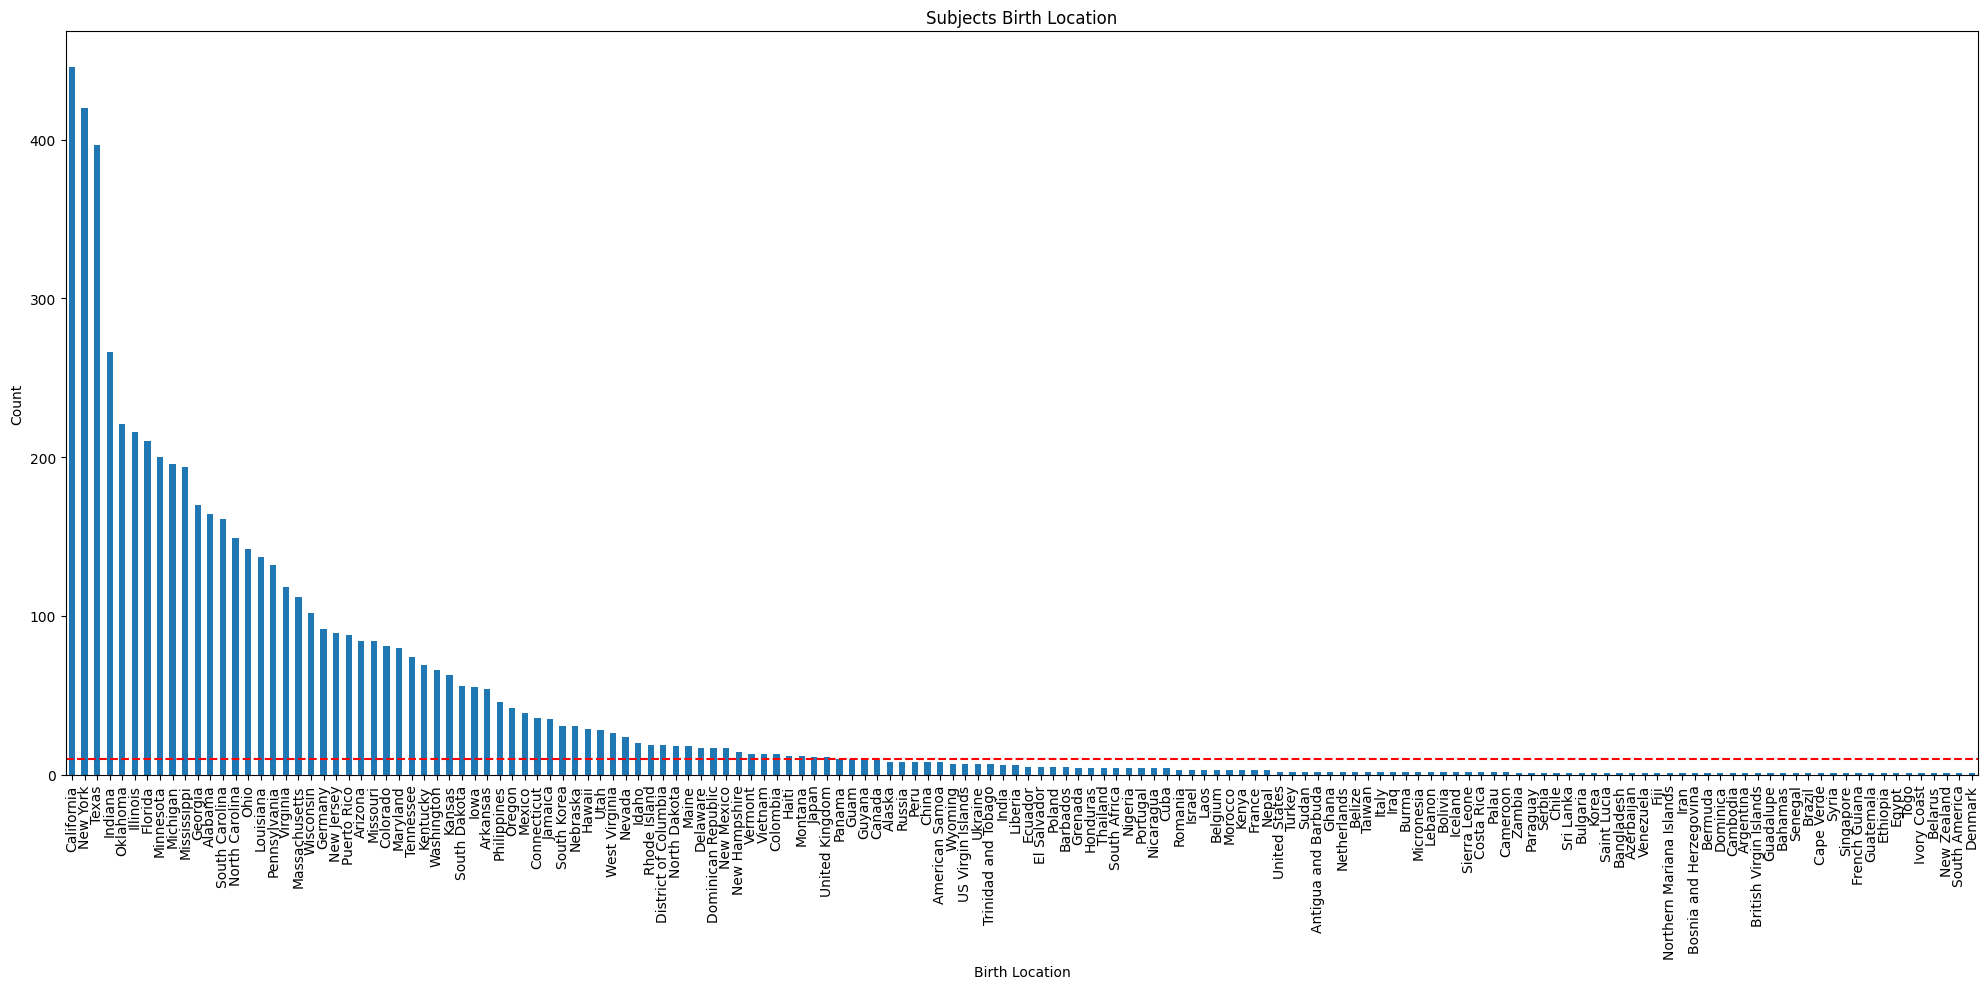

In [24]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  # Some research says 10 rows are enough for each category to be represented
plt.tight_layout();

In [25]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [26]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [27]:
# to overcome the high cardinality problem in the SubjectsBirthLocation feature.
# We will use the following approach:
# 1. We will create a dictionary with the states by region
# 2. We will create a dictionary with the countries by continent
# 3. We will replace the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

# We tired this but it didn't work well.
# df["SubjectsBirthLocation"] = [states_by_region[i] if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
# df["SubjectsBirthLocation"].value_counts()

California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Missouri                 84
Arizona                  84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 54
South America       

In [28]:
df["SubjectsBirthLocation"].nunique()

57

In [29]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [30]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

# We rename the numeric data in my target according to the ethnic names
# specified in the document to make it more understandable.

In [31]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

# When we compare the distribution of the soldiers according to the units
# they serve, the white, black, hispanic distribution in the 3 units is similar
# or close to the general distribution in the original data.
# There is no component dominated by Hispanic race. We were unable to obtain
# insight into the identification of race through Component feature.

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

<Axes: ylabel='Component,DODRace'>

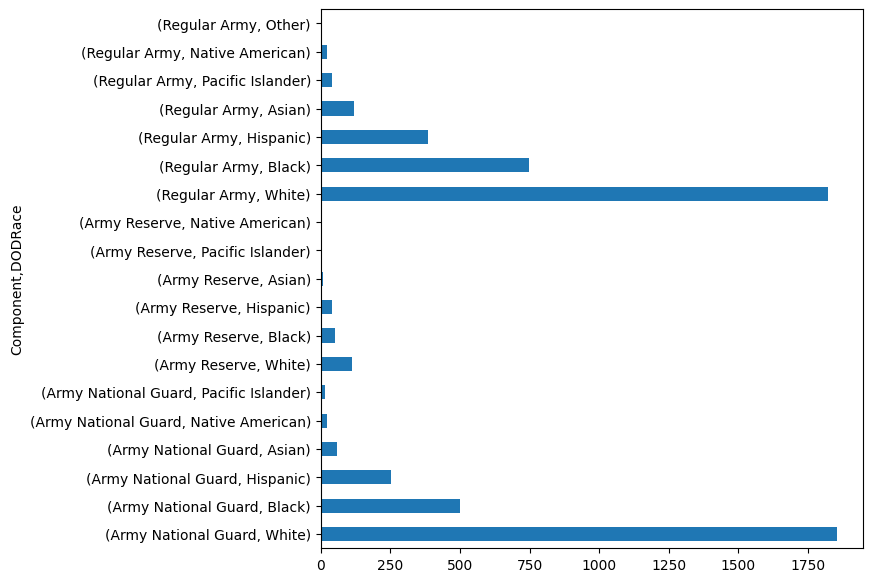

In [32]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(7, 7))

In [63]:
ct = pd.crosstab( df.Component,df.DODRace, margins=True, margins_name="Total", normalize='index')
ct


DODRace                 Asian     Black  Hispanic  Native American     Other  Pacific Islander     White
Component                                                                                               
Army National Guard  0.022157  0.184269  0.093427         0.008863  0.000000          0.006278  0.685007
Army Reserve         0.040909  0.236364  0.186364         0.004545  0.000000          0.013636  0.518182
Regular Army         0.037898  0.237898  0.122611         0.007643  0.000955          0.012420  0.580573
Total                0.030982  0.213909  0.111898         0.008075  0.000494          0.009723  0.624918

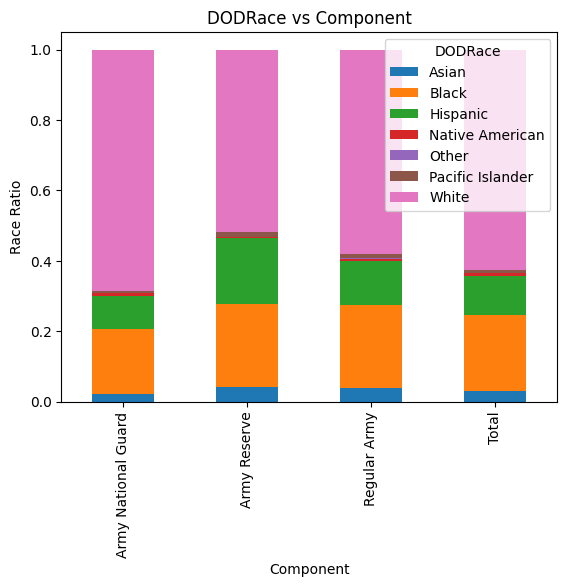

In [64]:
ct.plot(kind='bar', stacked=True)
plt.title('DODRace vs Component')
plt.xlabel('Component')
plt.ylabel('Race Ratio')
plt.show()

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# we obtained insights similar to the insights we obtained above.
# There are no Hispanic-dominated components or branches.
# We will drop "Component", "Branch" features.

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

In [65]:
ct = pd.crosstab( df.DODRace, [df.Component, df.Branch],  margins=True, margins_name="Total", normalize='columns')
ct

Component        Army National Guard                                       Army Reserve                                       Regular Army                                           Total
Branch                   Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support          
DODRace                                                                                                                                                                                   
Asian                       0.022305               0.023158       0.018908     0.000000               0.047945       0.029412     0.033810               0.036806       0.044271  0.030982
Black                       0.097893               0.218947       0.226891     0.000000               0.164384       0.411765     0.122237               0.255147       0.317708  0.213909
Hispanic                    0.091698               0.099649       0.077731     0.166667               0.205479       0.147059     0.148244               0.120399       0.101562  0.111898
Native American             0.011152               0.007018       0.010504     0.000000               0.006849       0.000000     0.009103               0.008734       0.003906  0.008075
Other                       0.000000               0.000000       0.000000     0.000000               0.000000       0.000000     0.001300               0.001248       0.000000  0.000494
Pacific Islander            0.004957               0.007719       0.004202     0.000000               0.013699       0.014706     0.011704               0.008734       0.020833  0.009723
White                       0.771995               0.643509       0.661765     0.833333               0.561644       0.397059     0.673602               0.568933       0.511719  0.624918

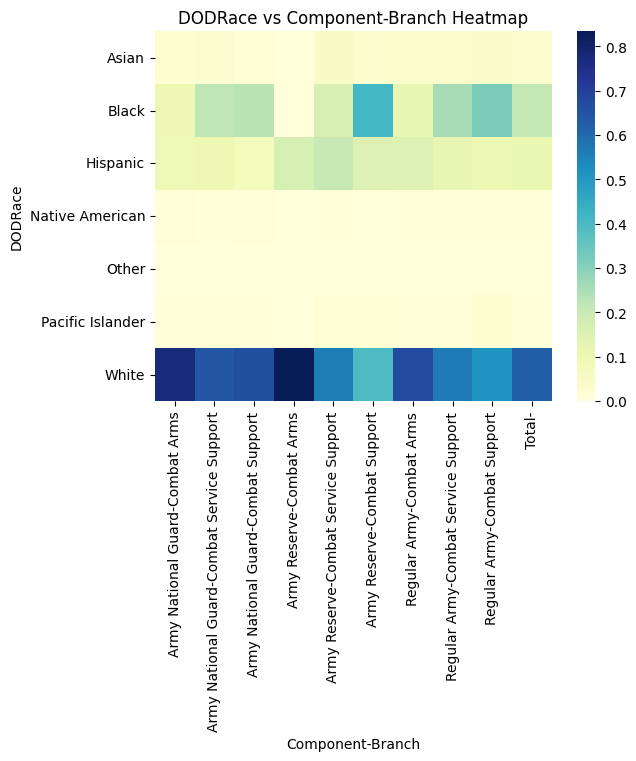

In [66]:
# Seaborn
sns.heatmap(ct, annot=False, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('DODRace vs Component-Branch Heatmap')
plt.show()

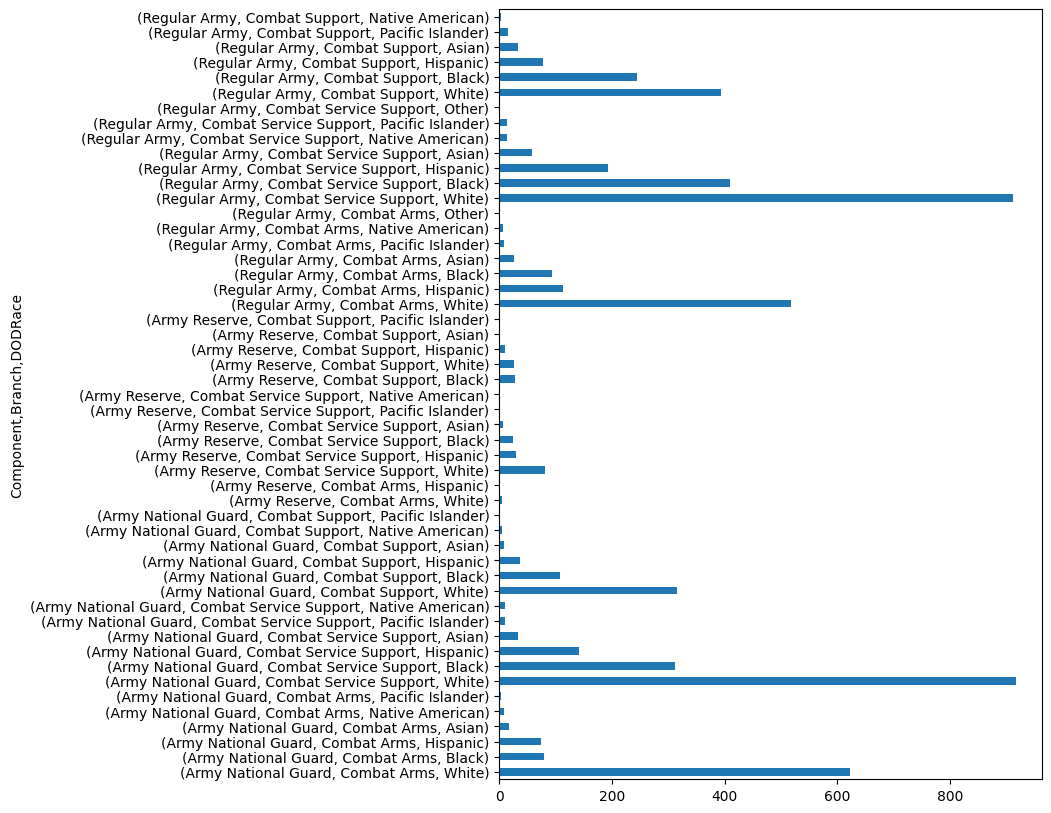

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(
    kind="barh", figsize=(7, 10)
);

In [ ]:
df.SubjectNumericRace.value_counts()

# a feature describing our target DODRace.
# We will drop it as it will cause data leakage.

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
drop_list2 = [
    "Date",
    "Installation",
    "Component",
    "Branch",
    "PrimaryMOS",
    "Weightlbs",
    "Heightin",
    "subjectid",
    "SubjectNumericRace",
]

df.drop(columns=drop_list2, inplace=True)

# We drop the "Weightlbs", "Heightin" features as they consist of information
# that soldiers self-report.
# height and weight information is measured and included in the data
# as a separate feature.
# Since subjectid is the unique registration number of the soldiers,
# it will cause leakage.

In [ ]:
df.shape

(6068, 98)

In [ ]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
df2 = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df2

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [ ]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [ ]:
# Apply the custom formatting function to each row
styled_df = df2.describe().T.style.apply(format_row_based_on_comparison, axis=1)

# Display the formatted DataFrame
styled_df

# From the dataframe below, we conclude that there are some outliers based on feature statsitics but not many

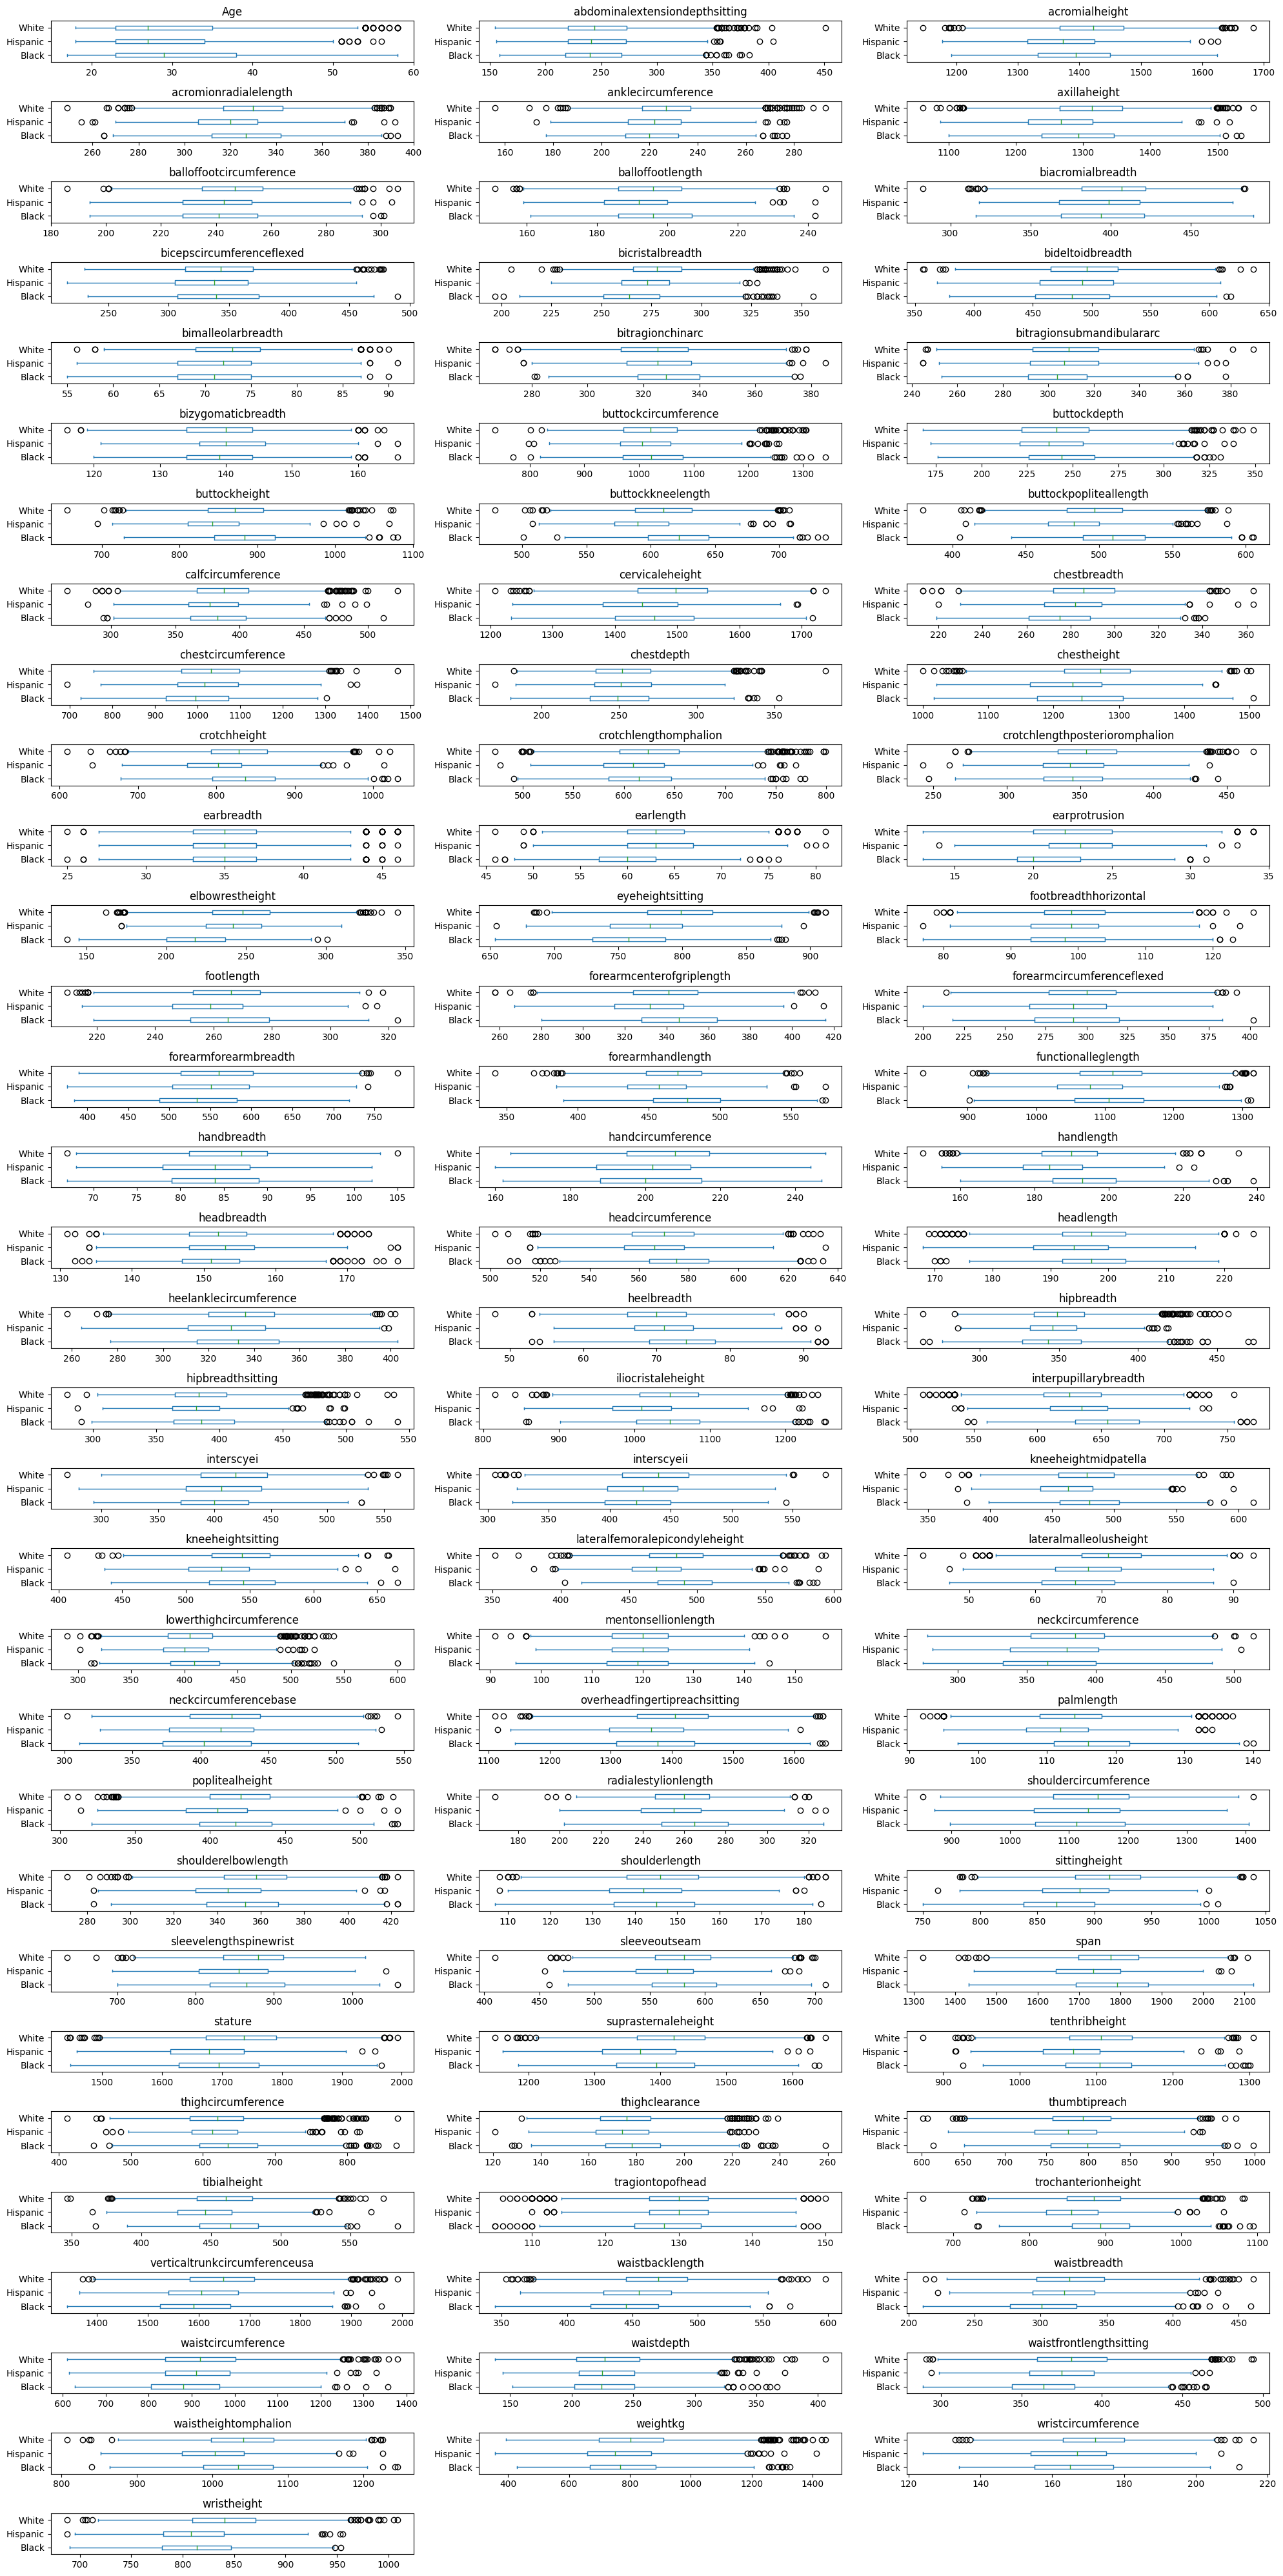

In [ ]:
df2.plot(by ='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();
# We confirmed that what we found out in basic statistics of dataframe
# We don't have many outliers in the data to effect the standart deviation
# Since mean and standard deviation are not very close to each other.
# Another important point to note is that we need to look at outliers in terms of target classes.
# For example, for the age feature black class has no outliers.

interactive(children=(Dropdown(description='col1', options=('abdominalextensiondepthsitting', 'acromialheight'…

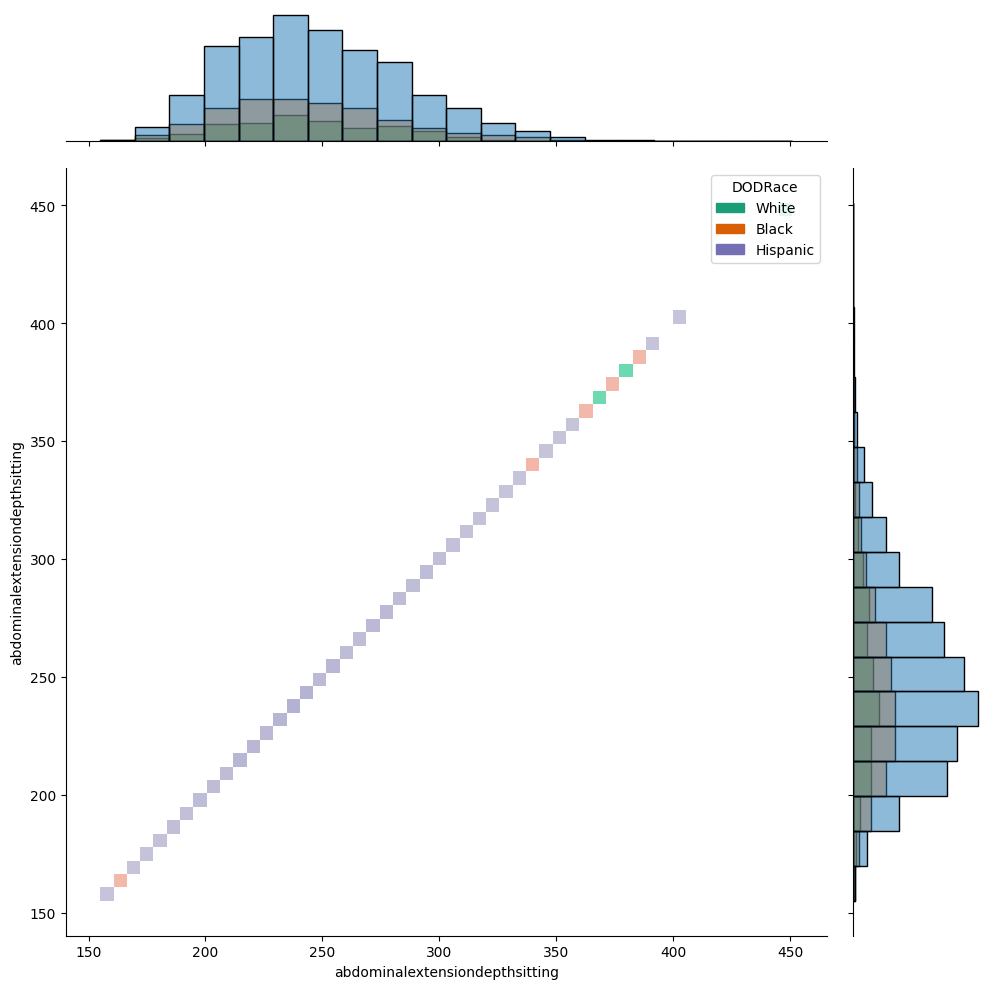

In [ ]:
def column_pair(col1,col2):
    sns.jointplot(data=df2,
                 x=col1,
                 y=col2,
                 kind="hist",
                 hue="DODRace",
                 palette='Dark2',
                 height=10,
                 marginal_kws={"bins":20},
                                 )
cols = df2.select_dtypes(exclude="O").columns
interact(column_pair, col1=cols, col2=cols);

# In the bivariate analysis, we did not notice any clear pattern in the data.

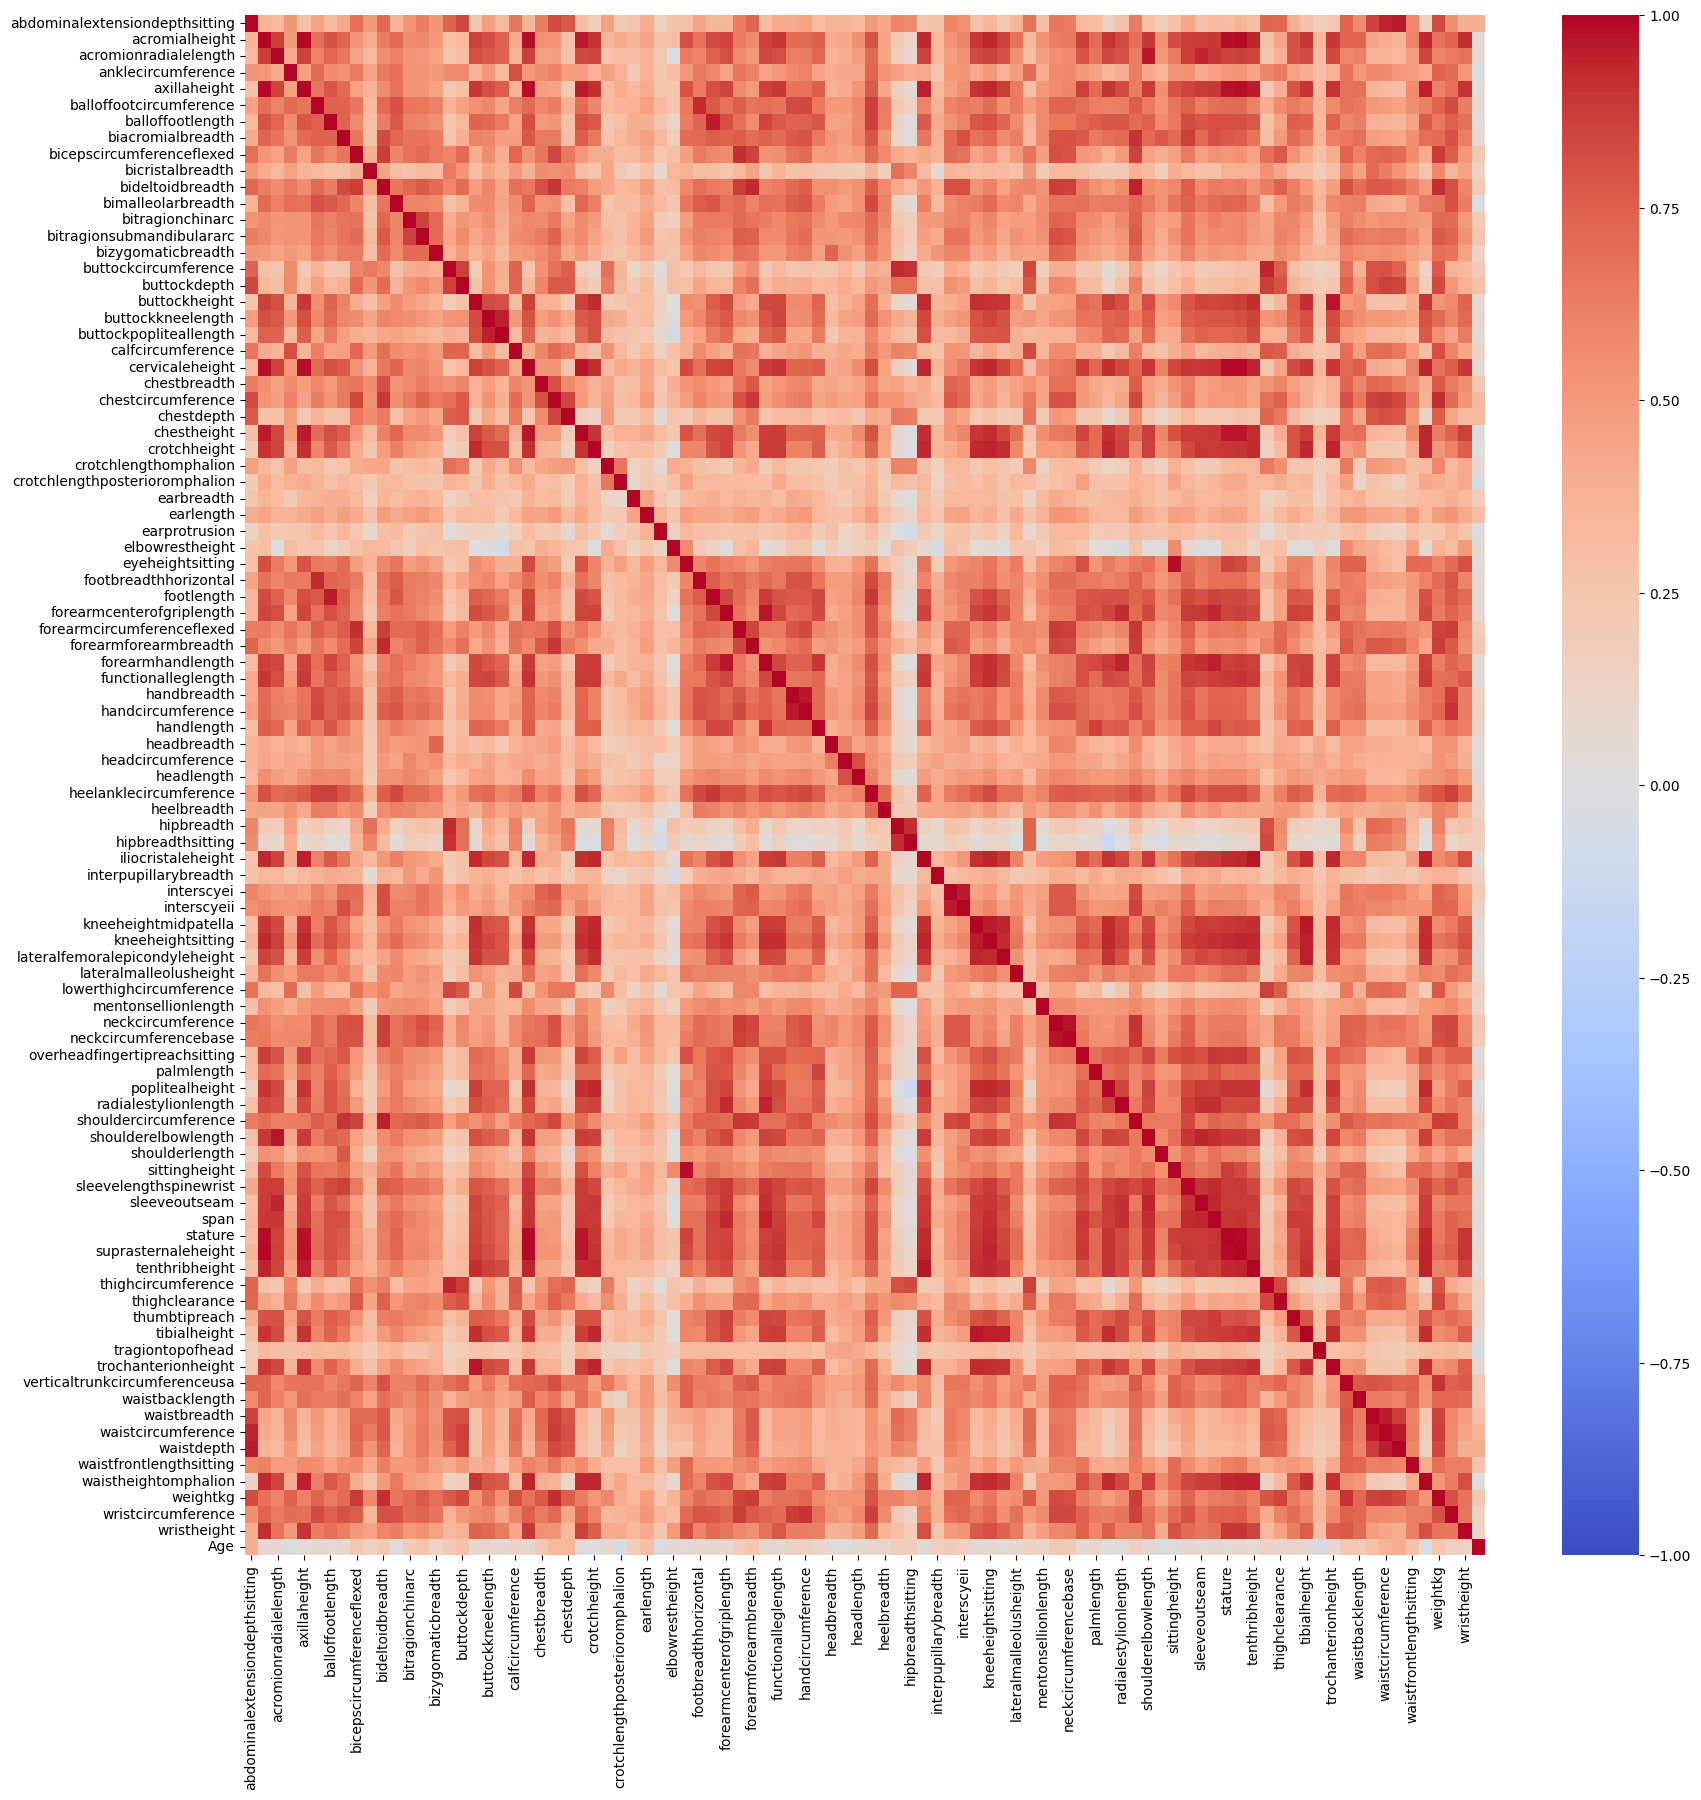

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# has a multicollinearity issue, but it's fine for logregg with regularisation and non-parametric algorithms.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = df2.drop(columns=["DODRace"])
y = df2.DODRace

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [ ]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  55  360 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [ ]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.481198
train_precision_Hispanic    0.521895
test_recall_Hispanic        0.771515
train_recall_Hispanic       0.827909
test_f1_Hispanic            0.592045
train_f1_Hispanic           0.640200
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
param_grid = {
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [ ]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.771515
mean_train_score    0.827909
Name: 7, dtype: object

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  55  360 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



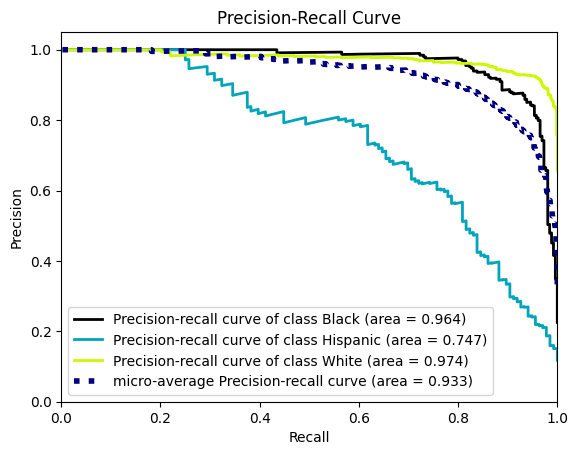

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

0.7467342926776523

In [ ]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables.

## Logistic Regression solver "liblenear" for small dataset

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)

# Since it is stated in the logistic regression documentation that liblinear is
# a good choice as a solver for small datasets.
# We are using liblinear. It can be used with liblinear l2 and l1.
# but we preferred l1 as it gives better scores with l1 than l2.

In [ ]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[239   6  15]
 [  5  96  35]
 [ 20  34 704]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.71      0.71      0.71       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 956   34   48]
 [  33  387  123]
 [  43  145 2846]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.68      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.86      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.651705
train_precision_Hispanic    0.681251
test_recall_Hispanic        0.655354
train_recall_Hispanic       0.703909
test_f1_Hispanic            0.652288
train_f1_Hispanic           0.692370
dtype: float64

## 2. SVC

### Vanilla SVC model

In [ ]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.456711
train_precision_Hispanic    0.503448
test_recall_Hispanic        0.758552
train_recall_Hispanic       0.834250
test_f1_Hispanic            0.569421
train_f1_Hispanic           0.627923
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [ ]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.758552
mean_train_score     0.83425
Name: 3, dtype: object

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



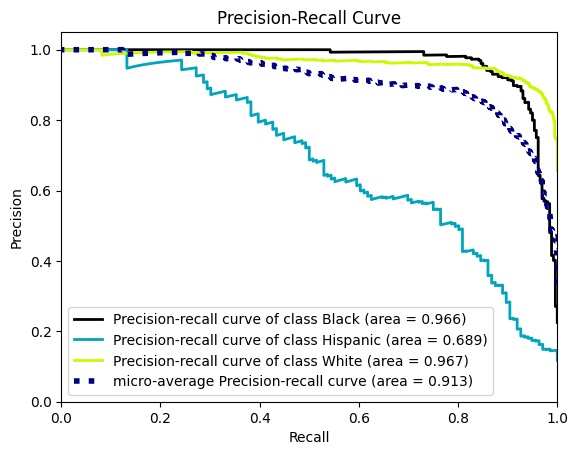

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [ ]:
decision_function

array([[-0.25612844,  1.00325241,  2.25595185],
       [ 0.89195662, -0.2388124 ,  2.25012752],
       [-0.19592464,  1.09009966,  2.17116119],
       ...,
       [ 1.1045256 , -0.20686875,  2.18035493],
       [-0.153075  ,  1.10406805,  2.09443233],
       [-0.26099374,  1.16938286,  2.24008703]])

In [ ]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [ ]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6891283060889173

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [ ]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[195   0  65]
 [  9   4 123]
 [ 14   2 742]]
              precision    recall  f1-score   support

       Black       0.89      0.75      0.82       260
    Hispanic       0.67      0.03      0.06       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.79      0.59      0.58      1154
weighted avg       0.80      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.866667
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.027659
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.053387
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    # 'RF_model__min_samples_split':[18,20,22],
    # 'RF_model__max_features': ['auto', None, 15, 20]
}

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [ ]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [ ]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.609582
mean_train_score    0.663906
Name: 2, dtype: object

In [ ]:
rf_grid_model.best_score_

0.6095820591233435

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[197  36  27]
 [ 17  77  42]
 [ 91 230 437]]
              precision    recall  f1-score   support

       Black       0.65      0.76      0.70       260
    Hispanic       0.22      0.57      0.32       136
       White       0.86      0.58      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.63      0.57      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 797  142   99]
 [  47  355  141]
 [ 241 1035 1758]]
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75      1038
    Hispanic       0.23      0.65      0.34       543
       White       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.62      0.67      0.60      4615
weighted avg       0.77      0.63      0.67      4615



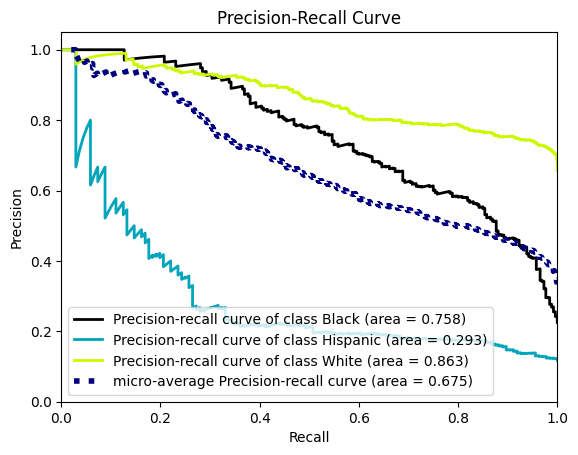

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2930735411262894

In [ ]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[225   4  31]
 [ 14  59  63]
 [ 17   5 736]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       260
           1       0.87      0.43      0.58       136
           2       0.89      0.97      0.93       758

    accuracy                           0.88      1154
   macro avg       0.88      0.76      0.79      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [ ]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
893   2.833026      1
196   0.507031      2
3821  0.507031      2
3206  0.507031      2
4500  1.482017      0

In [ ]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
dtype: int64

In [ ]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   9  24]
 [ 13  65  58]
 [ 21  19 718]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       260
           1       0.70      0.48      0.57       136
           2       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.730739
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.484285
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.581269
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [ ]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score      0.58386
mean_train_score    0.655621
Name: 31, dtype: object

In [ ]:
xgb_grid_model.best_score_

0.5838600067957866

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[202  35  23]
 [ 16  75  45]
 [104 169 485]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.69       260
           1       0.27      0.55      0.36       136
           2       0.88      0.64      0.74       758

    accuracy                           0.66      1154
   macro avg       0.59      0.66      0.60      1154
weighted avg       0.75      0.66      0.68      1154


Train_Set
[[ 799  144   95]
 [  56  350  137]
 [ 281  643 2110]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1038
           1       0.31      0.64      0.42       543
           2       0.90      0.70      0.78      3034

    accuracy                           0.71      4615
   macro avg       0.64      0.70      0.65      4615
weighted avg       0.79      0.71      0.73      4615



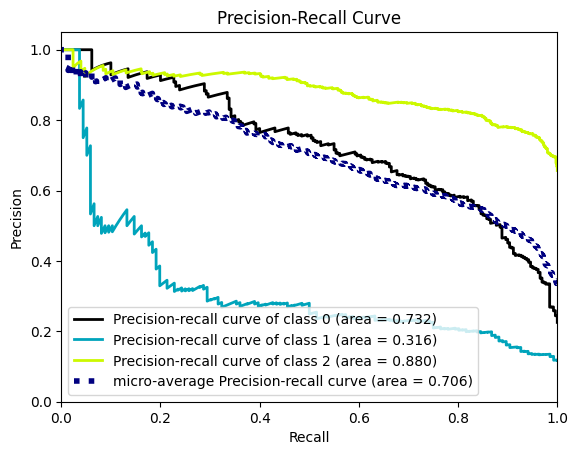

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [ ]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [ ]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.31611801966362085

In [ ]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

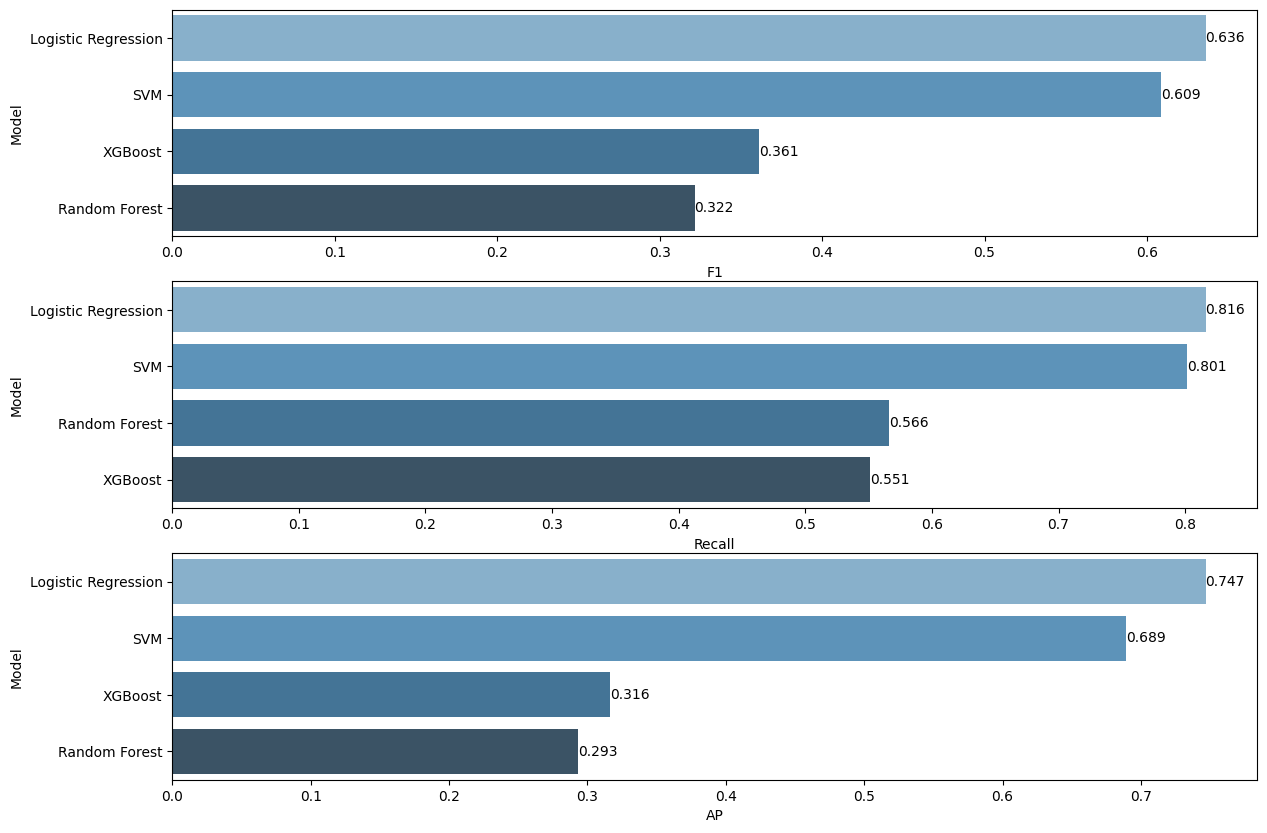

In [ ]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X[X.Gender == "Male"].describe()

# We will make predictions on the model based on the average
# values of all male soldiers in our data.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     3899.000000     3899.000000            3899.000000         3899.000000   3899.000000               3899.00000       3899.000000        3899.000000                3899.000000       3899.000000       3899.000000         3899.000000       3899.000000                3899.000000         3899.000000           3899.000000   3899.000000    3899.000000        3899.000000             3899.000000        3899.000000      3899.000000   3899.000000         3899.000000  3899.000000  3899.000000   3899.000000            3899.000000                     3899.000000  3899.000000  3899.000000    3899.000000      3899.000000       3899.000000            3899.000000  3899.000000                3899.000000                 3899.000000            3899.000000        3899.000000          3899.000000  3899.000000        3899.000000  3899.000000  3899.000000        3899.000000  3899.000000             3899.000000  3899.000000  3899.000000        3899.000000         3899.000000   
mean                       255.449090     1442.946397             335.819441          229.590921   1331.098487                252.16594        201.229546         416.004360                 358.579636        275.632213        510.927674           74.844063        331.655809                 315.718389          142.434983           1021.294178    246.362401     889.500385         619.217235              504.001026         392.426520      1519.422160    289.786868         1060.496794   254.390100  1293.040267    847.637599             623.143114                      356.354706    36.095153    64.171070      23.109772       244.823544        804.885099             101.893819   271.573993                 349.573480                  310.528084             580.702231         480.928956          1132.125673    88.379841         212.571172   193.509361   154.183637         574.708130   199.760708              344.002052    72.564504   346.256732         379.948448         1063.412670   
std                         37.295117       62.356906              17.281413           14.579399     58.714251                 12.89351         10.329358          19.074837                  34.511924         17.512428         32.450260            4.097052         13.970798                  16.640502            6.141613             76.330564     26.422432      49.412061          30.060334               26.981352          29.698052        62.429846     18.190824           87.116923    26.173356    56.142581     45.922897              46.408840                       29.395642     3.011680     4.499327       2.983150        28.714115         33.091957               5.227999    12.927804                  17.874884                   21.844380              50.829944          23.082555            55.414466     4.350016          10.141394     9.881058     5.453721          15.956198     6.854976               16.409163     5.473677    24.074708          30.120115           51.461725   
min                        163.000000  

In [ ]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [ ]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [ ]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength anklecircumference axillaheight balloffootcircumference balloffootlength biacromialbreadth bicepscircumferenceflexed bicristalbreadth bideltoidbreadth bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc bizygomaticbreadth buttockcircumference buttockdepth buttockheight buttockkneelength buttockpopliteallength calfcircumference cervicaleheight chestbreadth chestcircumference chestdepth  chestheight crotchheight crotchlengthomphalion crotchlengthposterioromphalion earbreadth earlength earprotrusion elbowrestheight eyeheightsitting footbreadthhorizontal  footlength forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth forearmhandlength functionalleglength handbreadth handcircumference  handlength headbreadth headcircumference  headlength heelanklecircumference heelbreadth  hipbreadth hipbreadthsitting iliocristaleheight interpupillarybreadth  interscyei interscyeii  \
mean                      255.44909    1442.946397            335.819441         229.590921  1331.098487               252.16594       201.229546         416.00436                358.579636       275.632213       510.927674          74.844063       331.655809                315.718389         142.434983          1021.294178   246.362401    889.500385        619.217235             504.001026         392.42652      1519.42216   289.786868        1060.496794   254.3901  1293.040267   847.637599            623.143114                     356.354706  36.095153  64.17107     23.109772      244.823544       804.885099            101.893819  271.573993                 349.57348                 310.528084            580.702231        480.928956         1132.125673   88.379841        212.571172  193.509361  154.183637         574.70813  199.760708             344.002052   72.564504  346.256732        379.948448         1063.41267            639.948705  431.393947  450.628623   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight lateralmalleolusheight lowerthighcircumference mentonsellionlength neckcircumference neckcircumferencebase overheadfingertipreachsitting  palmlength poplitealheight radialestylionlength shouldercircumference shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist sleeveoutseam         span      stature suprasternaleheight tenthribheight thighcircumference thighclearance thumbtipreach tibialheight tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa waistbacklength waistbreadth waistcircumference waistdepth waistfrontlengthsitting waistheightomphalion    weightkg wristcircumference wristheight Gender SubjectsBirthLocation        Age WritingPreference  
mean           489.366504        555.224929                     492.625545              73.061554              409.670685          122.684534        398.192101            435.159528                   1428.469351  116.610156      430.684791           268.313927           1179.902539          364.305976     149.832265    918.678636             897.179277    594.007951  1816.628879  1758.385483         1440.699667    1122.444473         626.335214      180.73942    813.085407   469.222878       131.116697          902.586817                   1666.783278      478.017953   327.110798         943.043344   238.5604               388.01744          1058.239805  858.714286         176.168761  848.762247   Male            California  30.172352        Right hand

In [ ]:
final_model.predict(pd.DataFrame(male_mean_human).T)

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

array(['Hispanic'], dtype=object)

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

0.7714885514629068

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7633856827778824

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
# equalizes or approximates minority classes to the majority class.
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
X_train_ohe = column_trans.fit_transform(X_train)

# First, we manually transform X_train and X_test' one hot encoder.

In [ ]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

# over_sampling(smote) and under_sampling (RandomUnderSampler) apply to X_train and y_train only.
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

In [ ]:
X_train_over.shape

(9102, 156)

In [ ]:
y_train_over.value_counts()

# As you can see, all classes after smote are equal to the number of
# observations of the majority class, white.

# However, equating or approximating the minority class to the majority
# class will result in overfitting of the model. Therefore, the number of observations
# belonging to the minority class should be increased in a controlled manner
# to avoid overfitting.

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [ ]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
X_train_under.shape

(1629, 156)

In [ ]:
y_train_under.value_counts()

# As you can see, all classes after RandomUnderSampler are equal to the
# number of observations in the minority class hispanic.

# Equalizing or approximating the majority class to the minority class will
# result in a very serious loss of information of the observations in
# the majority class. Even if the scores improve, this improvement will only be
# an overestimate. For this reason, a 20%-30% reduction should be done from
# the Majority class. However, if there is still no improvement in the scores,
# this rate should not be increased further.

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [ ]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_over.value_counts()

# With over, we doubled the number of observations in the Hispanic class.
# But we need to check below whether this increase causes overfitting.

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_under.value_counts()
# We reduced the number of white observations by around 18% and equalized to 2500.

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [ ]:
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [ ]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]  # ("scaler", MinMaxScaler())

# When over or under sampling is applied to data, class_weight="balanced" is never used.

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[231  10  19]
 [  6  97  33]
 [ 12  38 708]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       260
    Hispanic       0.67      0.71      0.69       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.84      0.85      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 936   39   63]
 [  28  380  135]
 [  25  149 2860]]
              precision    recall  f1-score   support

       Black       0.95      0.90      0.92      1038
    Hispanic       0.67      0.70      0.68       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.90      0.91      4615



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.632214
train_precision_Hispanic    0.675765
test_recall_Hispanic        0.660943
train_recall_Hispanic       0.704931
test_f1_Hispanic            0.645480
train_f1_Hispanic           0.690036
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# conda install -c conda-forge shap

In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)

# Since the Shap doesn't work with the model fitted with pipeline,
# we will apply the conversions manually.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [ ]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[238  12  10]
 [  6 110  20]
 [ 28  85 645]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.89       260
    Hispanic       0.53      0.81      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 957   48   33]
 [  25  447   71]
 [  62  345 2627]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.53      0.82      0.65       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [ ]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

# no overfitting.

test_precision_Hispanic     0.486781
train_precision_Hispanic    0.534101
test_recall_Hispanic        0.764169
train_recall_Hispanic       0.831026
test_f1_Hispanic            0.594371
train_f1_Hispanic           0.650231
dtype: float64

In [ ]:
features = column_trans_shap.get_feature_names_out()
features

# Since we perform the transformation with the make_column_transform function,
# we will use this feature order within the Shap function since the feature
# order of the X_train_trans and X_test_trans data changes as follows.

array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Africa',
       'SubjectsBirthLocation_Alabama', 'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Arizona', 'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Asia', 'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBirthLocation_Delaware',
       'SubjectsBirthLocation_District of Columbia',
       'SubjectsBirthLocation_Europe', 'SubjectsBirthLocation_Florida',
       'SubjectsBirthLocation_Georgia', 'SubjectsBirthLocation_Hawaii',
       'SubjectsBirthLocation_Idaho', 'SubjectsBirthLocation_Illinois',
       'SubjectsBirthLocation_Indiana', 'SubjectsBirthLocation_Iowa',
       'SubjectsBirthLocation_Kansas', 'SubjectsBirthLocation_Kentucky',
       'SubjectsBirthLocation_Louisiana', 'SubjectsBirthLocation_Maine',
       'SubjectsBirthLocation_Maryland',
       'SubjectsBirthLocation_Massachusetts',
       'Subj

## Shap values for test data

In [ ]:
np.__version__

'1.22.4'

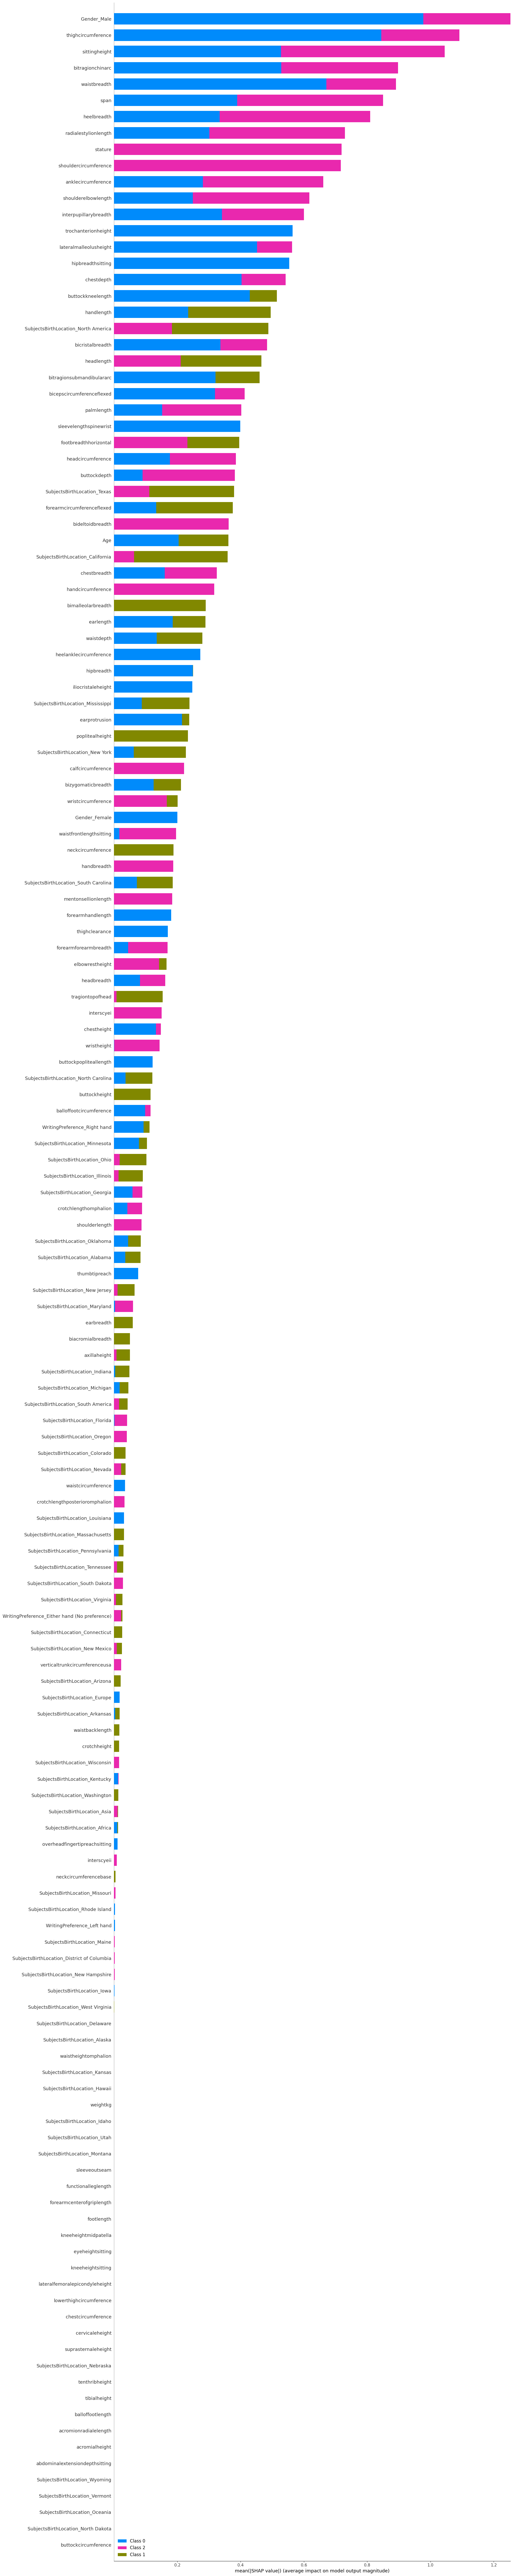

In [ ]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

# shap asks for numpy 1.24 or lower.

# Since the shap values we get from X_test data may cause data_leakage.
# We will get the shap values from the train data below.

# Although it is recommended to use shap mostly with linear and tree-based models.
# You can get shap values in non-parametric models such as KNN and SVM.

## SHAP values for Feature Selection (train data)

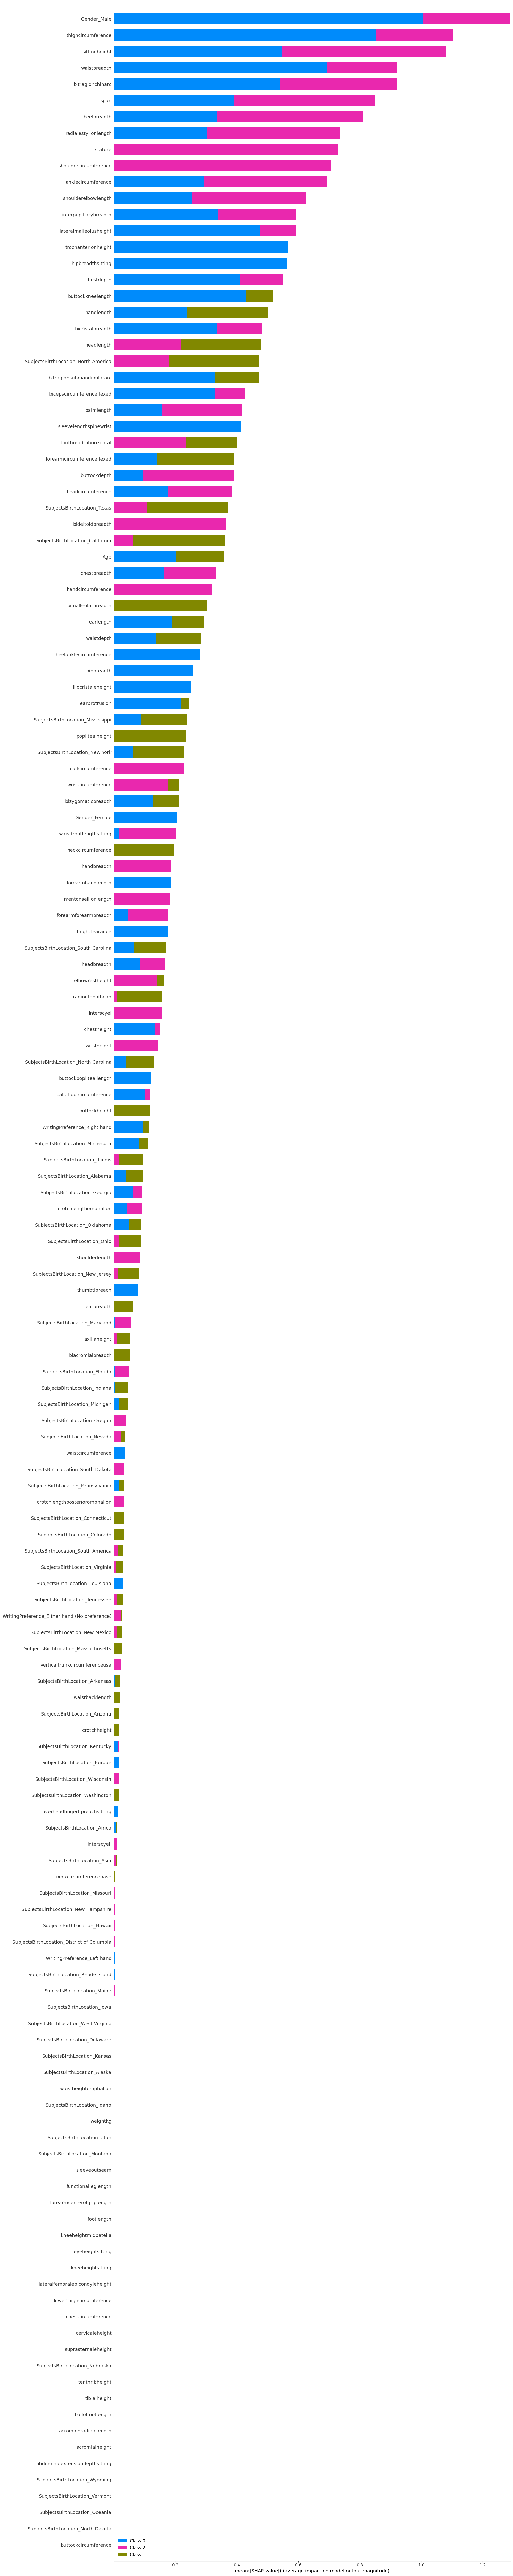

In [ ]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

# blues black, pink white and green hispanic
# as you can see, there is no feature that contributes to the prediction of hispanic among
# the top 13 most important features.
# We choose 19 features that contribute to the predictions of hispanics.

In [ ]:
hispanic = [
    "SubjectsBirthLocation",
    "handlength",
    "forearmcircumferenceflexed",
    "headlength",
    "bitragionsubmandibulararc",
    "footbreadthhorizontal",
    "bimalleolarbreadth",
    "poplitealheight",
    "waistdepth",
    "WritingPreference",
    "tragiontopofhead",
    "bideltoidbreadth",
    "neckcircumferencebase",
    "biacromialbreadth",
    "buttockheight",
    "buttockkneelength",
    "earlength",
    "axillaheight",
    "Age",
]

In [ ]:
# X.columns

In [ ]:
X2 = X[hispanic]
X2.head()

SubjectsBirthLocation  handlength  forearmcircumferenceflexed  headlength  bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth  poplitealheight  waistdepth WritingPreference  tragiontopofhead  bideltoidbreadth  neckcircumferencebase  biacromialbreadth  buttockheight  buttockkneelength  earlength  axillaheight  Age
0          North Dakota         193                         299         206                        291                    101                  71              437         240        Right hand               140               493                    436                401            882                619         71          1347   41
1              New York         195                         289         201                        320                     98                  67              417         225         Left hand               120               479                    420                394            870                584         62          1293   35
2              New York         203                         357         202                        330                    103                  75              431         255         Left hand               125               544                    434                427            901                623         61          1327   42
3             Wisconsin         194                         318         199                        309                    106                  73              393         205        Right hand               127               518                    446                401            821                560         66          1239   31
4        North Carolina         218                         324         197                        310                    111                  80              523         214        Right hand               122               524                    430                435           1080                706         56          1478   21

In [ ]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
X2.shape

(5769, 19)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=101, stratify=y
)

In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [ ]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[204  21  35]
 [  8 107  21]
 [ 96 120 542]]
              precision    recall  f1-score   support

       Black       0.66      0.78      0.72       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.72      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.76      0.69      1154
weighted avg       0.80      0.74      0.75      1154


Train_Set
[[ 848   78  112]
 [  38  430   75]
 [ 352  498 2184]]
              precision    recall  f1-score   support

       Black       0.68      0.82      0.75      1038
    Hispanic       0.43      0.79      0.56       543
       White       0.92      0.72      0.81      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.81      0.75      0.76      4615



In [ ]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(
    model, X_train2, y_train2, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.414495
train_precision_Hispanic    0.428340
test_recall_Hispanic        0.767890
train_recall_Hispanic       0.793275
test_f1_Hispanic            0.538191
train_f1_Hispanic           0.556286
dtype: float64

**both states and countries encoded**
- test_precision_Hispanic     0.383408
- train_precision_Hispanic    0.388484
- test_recall_Hispanic        0.694275
- train_recall_Hispanic       0.708571
- test_f1_Hispanic            0.493329
- train_f1_Hispanic           0.501797


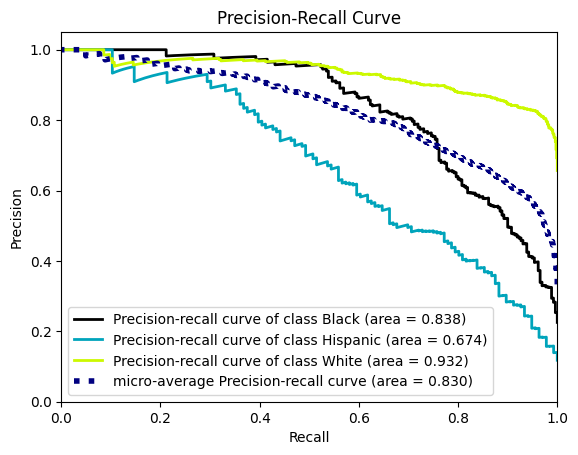

In [ ]:
y_pred_proba = pipe_shap_model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show();

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
